In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
from prm import *

In [3]:
import sys 
sys.path.append('..')
from codeprint import RawCode

# Probablistic Roadmap (PRM)

### Define Node Class
* variables : position, edge, f, g, parent(previous node)
* methods : 
    * \- (sub) : calculate euclidean distance
    * \= (equal) : same node position
    * < (less than) : compare node cost for sorting
    * repr : print node information
    * show : visualize node position

In [4]:
code = RawCode('prm.py')
code.show('Node')

class Node():
    def __init__(self, position, edge=[]):
        self.position = np.array(position)
        self.edge = edge
        self.f = np.inf
        self.g = 0
        self.parent = None
        
    def __sub__(self, other):
        return LA.norm(self.position-other.position)
    
    def __repr__(self):
        return 'pos:{0}, f:{1}, edge_num:{2}'.format(self.position, self.f, len(self.edge))
    
    def __eq__(self, other):
        return np.array_equal(self.position, other.position)
    
    def __lt__(self,other):
        return self.f < other.f
    
    def show(self, **kwargs):
        plt.gca().scatter(self.position[0], self.position[1], **kwargs)
        plt.xlim([0,10])
        plt.ylim([0,10])


### Define PRM Algorithm Class
* variables : 
    * smpl_area : map area for RRT
    * obstacles : circular obstacles informations
* methods : 
    * get_rnd_smpls : select random points in smpl_area
    * is_goal : goal node detection using euclidean distance
    * node_is_collision : node collision detection using euclidean distance
    * edge_is_collision : edge collision detection calculated by dividing two points by 10
    * node_get_neighbors : Search neighbor node by distance
    * is_in_area : check if node is in area
    * find_nearest_node : find nearest node in tree
    * fine_neighbor_nodes : find neighbor node of new_node by distance

In [5]:
code.show('PRMAlg')

class PRMAlg():
    nodes = []
    
    def __init__(self, start, end, smpl_area, obstacles):
        self.start = start
        self.end = end
        self.smpl_area = smpl_area
        self.obstacles = obstacles
    
    def get_rnd_smpls(self, num):
        output = []
        area = self.smpl_area
        while len(output) < num:
            pos = np.array((random.uniform(*area[0:2]), random.uniform(*area[2:4])))
            if not self.node_is_collision(pos):
                output.append(pos)
        return np.array(output)
            
    def edge_is_collision(self, pos1, pos2):
        step = (pos2-pos1)/10
        points = [pos1 + step*i for i in np.arange(11)]
        for pt in points:
            for obs in self.obstacles:
                obs_pos = np.array(obs[0:2])
                obs_radius = obs[2]
                if LA.norm(pt - obs_pos) <= obs_radius:
                    return True
        return False
    def node_is_collision(self, pos):
        for obs in self.obs

In [6]:
code.show('AstarAlg')

class AstarAlg():
    open_list = []
    closed_list = []
    
    def __init__(self, start=None, end=None):
        self.start = start
        self.end = end
    
    def get_neighbor_node(self, curr_node):
        return curr_node.edge
        
    def is_goal(self, node):
        return node == self.end
    
    def calc_cost(self, node):
        #calc cost
        if type(node.parent) == type(None):
            node.g = 1
        else:
            node.g = node.parent.g + 1            # the cost of the cheapest path from start
        node.h = self.end - node              # heuristic : manhattan distance
        node.f = node.g + node.h    # best guess
        return node
    
    def is_update_condition(self, node):
        #if node is in open list and cost is higher, update (delete and add).
        #if node is in open list and cost is lower, pass.
        #if node is not in open list, add
        
        for temp_node in self.open_list:
            if (temp_node == node):
     

## PRM Class : PRM Algorithm(Graph) + A*(Search) + Visualization

In [7]:
code.show('PRM')

class PRM(PRMAlg, AstarAlg):
    def __init__(self, start, end, smpl_area, obstacles):
        PRMAlg.__init__(self, start, end, smpl_area, obstacles)
        
    def plot_node(self):
        ax = plt.gca()
        nodes_pos = np.array([node.position.tolist() for node in self.nodes])
        plt.scatter(*nodes_pos.T)
        
    def plot_edge(self):
        ax = plt.gca()
        visited = []
        for node in self.nodes:
            visited.append(node)
            for edge in node.edge:
                if not edge in visited:
                    pts = np.array([node.position, edge.position])
                    plt.plot(*pts.T,'k', alpha=0.2)
                    
    def plot_graph(self):
        self.plot_edge()
        self.plot_node()
        
    def plot_lim(self):
        ax = plt.gca()
        ax.set_xlim(self.smpl_area[0:2])
        ax.set_ylim(self.smpl_area[2:4])
    
        
    def plot_obstacles(self):
        ax = plt.gca()
        circles = [mpatches.Circle(obs[:2

### Initialization

In [8]:
start_node = Node([5,5])
end_node = Node([1,1])
smpl_area = [0, 10, 0, 10]
obstacles = [(4,8,1), (6,4,1), (3,3,1)]
prm = PRM(start_node, end_node, smpl_area, obstacles)

## Graph : Probabilistic roadmap

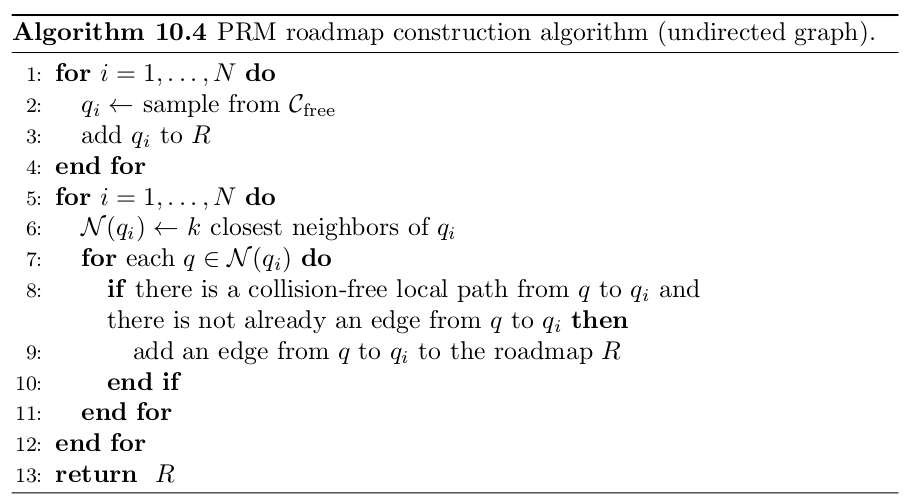

In [9]:
#pseudo code from [Modern Robotics]
Image(filename="prm_pseudocode.png", width=500)

* Loop1 : make nodes
    * if node is in free space (no collision), add


* Loop2 : make edges
    * get k nearest neighbors\
    * for each neighbors, check collision
        * check 10 dividing points of edge
        * if not collision, connect

In [10]:
# link edge if there is not collision
rnd_smpls_pos = prm.get_rnd_smpls(200)
prm.nodes = [Node(pos) for pos in rnd_smpls_pos]
prm.nodes.append(start_node)
prm.nodes.append(end_node)

for node in prm.nodes:
    nbrs = prm.node_get_neighbors(node, 10)
    edge_ = []
    for nbr in nbrs:
        if not prm.edge_is_collision(node.position, nbr.position):
            edge_.append(nbr)
    node.edge = edge_

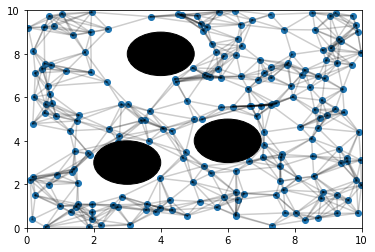

In [11]:
#visualization
prm.plot_graph()
prm.plot_obstacles()

## Search Graph : A*

### Initialization

In [12]:
for node in prm.nodes:
    node.f = np.inf
    node.g = 0
    node.parent=None

prm.open_list = [prm.start]
prm.closed_list = []
print('start:',prm.start.position)
print('end:',prm.end.position)

start: [5 5]
end: [1 1]


* rec for recording

In [13]:
rec = pd.DataFrame(columns=['x','y'])
while prm.open_list:
    prm.open_list.sort()
    curr = prm.open_list.pop(0)
    prm.closed_list.append(curr)
    
    rec.loc[len(rec),:] = curr.position #for recording
    
    if prm.is_goal(curr):
        print('goal')
        prm.end = curr #curr has parent information
        break
    
    nbrs = prm.get_neighbor_node(curr)
    
    for nbr in nbrs:
        if nbr in prm.closed_list:
            continue
        prm.calc_cost(nbr)

        if prm.is_update_condition(nbr):
            nbr.parent = curr
            prm.open_list.append(nbr)
            

goal


### Reconstruct Path

* Result : 
  goal - goal.parent - goal.parent.parent - ...

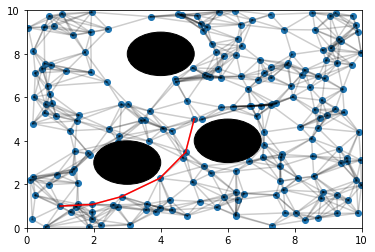

In [14]:
f, ax = plt.subplots()
prm.plot_graph()
prm.plot_obstacles()

# reconstruct path
temp = prm.end
while temp.parent:
    pts = np.array([temp.position, temp.parent.position])
    ax.plot(*pts.T, color='r')
    temp = temp.parent

## Result Visualization

In [15]:
from animake import AniMaker
anim = AniMaker()

In [16]:
fig_init, ax_init = plt.subplots(figsize=[5,5])
prm.plot_obstacles()
im_init = anim.set_snapshot(num=20)
plt.close()

image added:  20


In [17]:
fig_node, ax_node = plt.subplots(figsize=[5,5])
prm.plot_obstacles()
prm.plot_node()
prm.start.show(color='r')
prm.end.show(color='r')
im_node = anim.set_snapshot(num=20)
plt.close()

image added:  40


In [18]:
fig_edge, ax = plt.subplots(figsize=[5,5])
prm.plot_obstacles()
prm.plot_node()
prm.plot_edge()
prm.start.show(color='r')
prm.end.show(color='r')
im_edge = anim.set_snapshot(num=20)
plt.close()

image added:  60


In [19]:
fig_search, ax = plt.subplots(figsize=[5,5])
prm.plot_obstacles()
prm.plot_node()
prm.plot_edge()
prm.start.show(color='r');
prm.end.show(color='r');

for i, (x, y) in rec.iterrows():
    plt.scatter(x, y, color='#ff7f0e')
    im_search = anim.set_snapshot()
plt.close()

image added:  66


In [20]:
fig_sol, ax = plt.subplots(figsize=[5,5])
prm.plot_obstacles()
prm.plot_node()
prm.plot_edge()
prm.start.show(color='r')
prm.end.show(color='r')

plt.scatter(rec.x, rec.y, color='#ff7f0e')
# reconstruct path
temp = prm.end
while temp.parent:
    pts = np.array([temp.position, temp.parent.position])
    ax.plot(*pts.T, color='r')
    temp = temp.parent
im_sol = anim.set_snapshot(num=20)
plt.close()

image added:  86


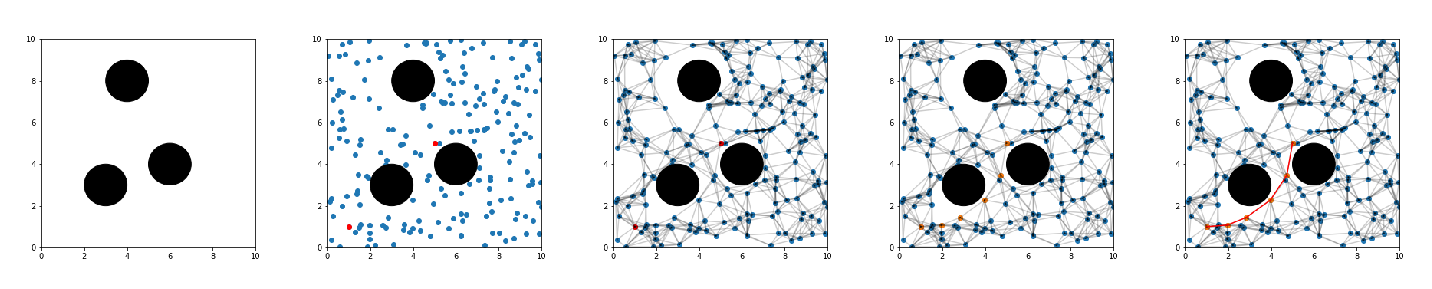

In [21]:
images = [im_init, im_node, im_edge, im_search, im_sol]
fig, ax_arr = plt.subplots(1,len(images), figsize=[20,5])

for ax, im in zip(ax_arr, images):
    ax.imshow(im)
    ax.axis('off')
plt.tight_layout()

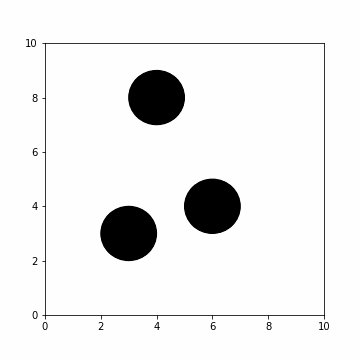

In [22]:
anim.make_gif('out_prm.gif')
Image(filename="out_prm.gif")